In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<BarContainer object of 2230 artists>

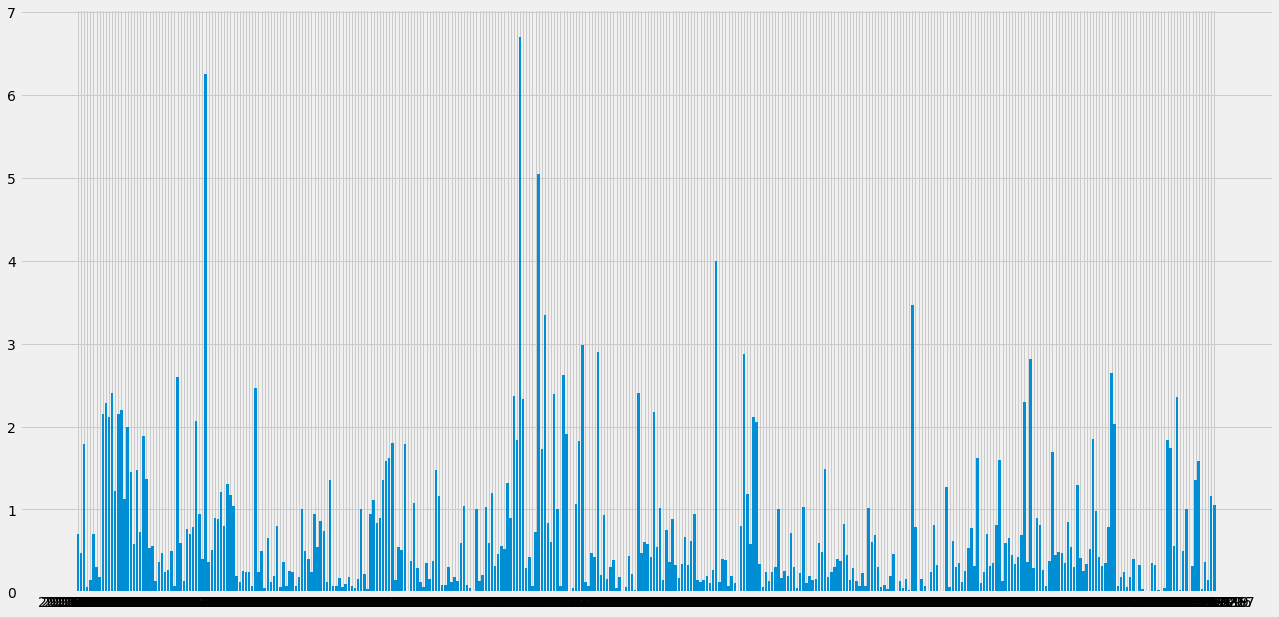

In [163]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Station.__table__.columns.values()
Measurement.__table__.columns.values()

session.query(Measurement.date).count()

session.query(Measurement.date).order_by(Measurement.date).first()

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
last_point=dt.date(2017, 8, 23)

aug_23_2016 = last_point - dt.timedelta(days=365)

aug_23_2016

# Perform a query to retrieve the data and precipitation scores
Measurement.__table__.columns.values()

last_yr_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= aug_23_2016).all()

last_yr_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column

last_yr_dt = pd.DataFrame(last_yr_prcp)

df = last_yr_dt.set_index('date')
df

# # Sort the dataframe by date
df

reset_index = df.sort_index()

reset_index.head()

# # Use Pandas Plotting with Matplotlib to plot the data

# # group_dates = reset_index.groupby(['date']).sum()['prcp']
# len(last_yr_dt['date'])
# x_axis = np.arange(len(last_yr_dt['date']))
# height = reset_index['prcp']

# # # prcp = reset_index['prcp']

# plt.figure(figsize=(20,10));

# plt.bar(last_yr_dt['date'], height=reset_index['prcp'], alpha=1, align='center', width=.8)


In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data

reset_index.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [73]:
# Design a query to show how many stations are available in this dataset?
Station.__table__.columns.values()

session.query(Station.station).count()

9

In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Station.__table__.columns.values()

Measurement.__table__.columns.values()

count_by_station =  session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
count_by_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [80]:
# Using the station id from the previous query, calculate 
Measurement.__table__.columns.values()

# the lowest temperature recorded 
min_temp = session.query(func.min(Measurement.tobs).label('min')).filter(Measurement.station=='USC00519281')

print(min_temp.first())

# highest temperature recorded
max_temp = session.query(func.max(Measurement.tobs).label('max')).filter(Measurement.station=='USC00519281')

print(max_temp.first())
# average temperature of the most active station
average_temp = session.query(func.avg(Measurement.tobs).label('average')).filter(Measurement.station=='USC00519281')

print(average_temp.first())


(54.0,)
(85.0,)
(71.66378066378067,)


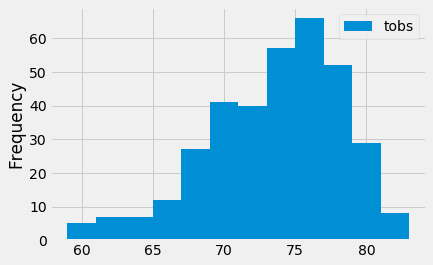

In [101]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Measurement.__table__.columns.values()

stations = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date>aug_23_2016).all()
# print(stations)

# dates = [station[0] for station in stations]

# tobs = [int(station[1]) for station in stations]

# print(dates)
most_active = pd.DataFrame(stations)
most_active.plot(kind='hist', bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
